In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import transforms, utils
from PIL import Image
import model_resnet

In [2]:
def imshow(ax, img,text=None,should_save=False):
    npimg = img.numpy()
    ax.axis("off")
    if text:
        ax.text(165, 21, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

In [3]:
device = torch.device('cpu')
best_model = model_resnet.resnet50().to(device)
best_model.load_state_dict(torch.load('model_resnet_arcface.pth', map_location='cpu'))
best_model.eval();

In [4]:
data_transform_color = transforms.Compose([
    transforms.Resize([227, 227]),
    transforms.ToTensor()
])

color_a1 = data_transform_color(Image.open('./demo_images/Assange1.jpg'))
color_a2 = data_transform_color(Image.open('./demo_images/Assange2.jpg'))
color_t1 = data_transform_color(Image.open('./demo_images/Taylor1.jpg'))
color_t2 = data_transform_color(Image.open('./demo_images/Taylor2.jpg'))

data_transform = transforms.Compose([
    transforms.Resize(best_model.input_size[1:]),
    #transforms.Grayscale(),
    transforms.ToTensor()
])

a1 = data_transform(Image.open('./demo_images/Assange1.jpg')).view(1, best_model.input_size[0], best_model.input_size[1], best_model.input_size[2])
a2 = data_transform(Image.open('./demo_images/Assange2.jpg')).view(1, best_model.input_size[0], best_model.input_size[1], best_model.input_size[2])
t1 = data_transform(Image.open('./demo_images/Taylor1.jpg')).view(1, best_model.input_size[0], best_model.input_size[1], best_model.input_size[2])
t2 = data_transform(Image.open('./demo_images/Taylor2.jpg')).view(1, best_model.input_size[0], best_model.input_size[1], best_model.input_size[2])

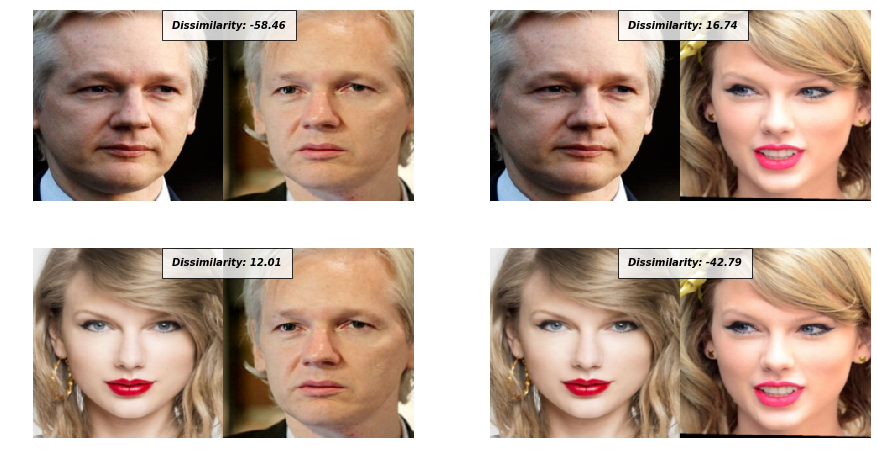

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

ax = axes.flat[0]
concatenated = torch.cat((color_a1,color_a2),2)
distance = best_model.forward_arc_face(a1, a2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(distance[0][1].item()))

ax = axes.flat[1]
concatenated = torch.cat((color_a1,color_t2),2)
distance = best_model.forward_arc_face(a1, t2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(distance[0][1].item()))

ax = axes.flat[2]
concatenated = torch.cat((color_t1,color_a2),2)
distance = best_model.forward_arc_face(t1, a2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(distance[0][1].item()))

ax = axes.flat[3]
concatenated = torch.cat((color_t1,color_t2),2)
distance = best_model.forward_arc_face(t1, t2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(distance[0][1].item()))

plt.show()